# Convolutional Neural Network (CNN)


Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in `image recognition` and `processing`. When discussing CNNs, several key terms and concepts come into play:

 - **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
    - **Convolutional Operation:** This operation involves a `kernel` (or `filter`) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently `focused` on. The result is a single value in the output feature map.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Load the Fashoin MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

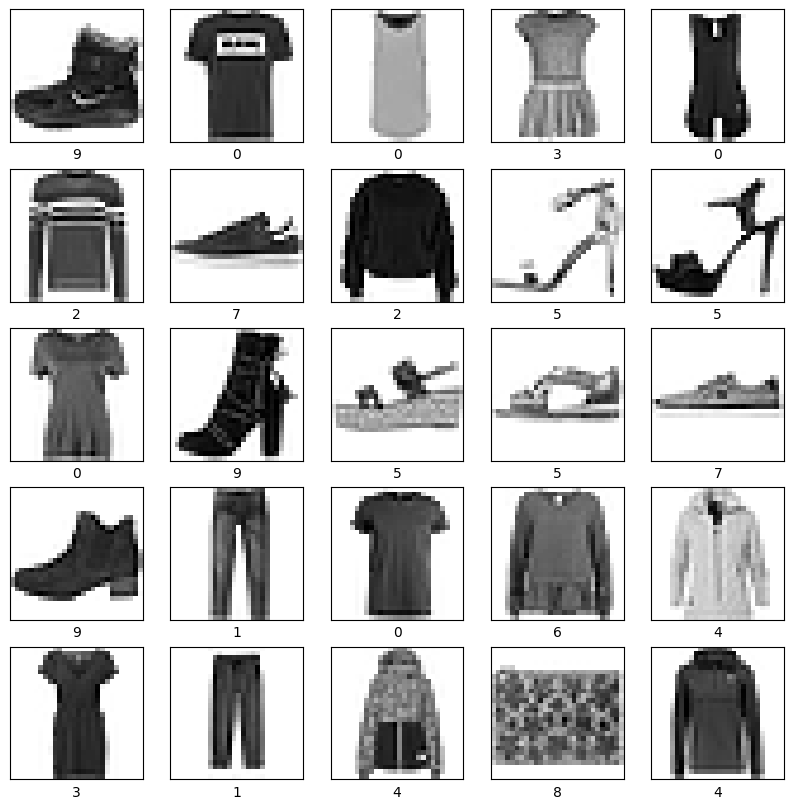

In [2]:


# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [3]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

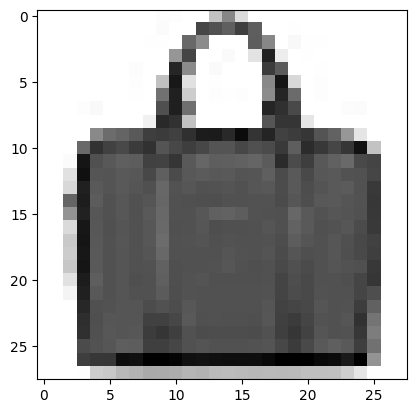

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[-210], cmap=plt.cm.binary) #[-2] is the image number from data set, it starts from 0 and ends at 59999.

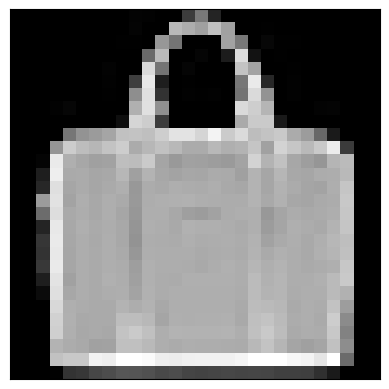

Pixel values:
  0   0   0   0   0   0   0   0   0   3   2   0   0  61 121  36   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   4   0   0 185 173 160 192 161   0   0   1   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   1   1   0 151 116   0   0   0 162 120   0   7   1   1   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 105 186   0   0   5   0  28 220  18   0   1   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   3   0   0 217 116   0   5   0   0   0 195 164   0   0   1   0   0   0   0   0   0 
  0   0   0   0   0   0   0   2   0  62 231  30   0   1   0   0   0 119 234  39   0   2   0   0   0   0   0   0 
  0   0   0   0   0   0   0   1   0 142 223  50   0   2   1   2   0 115 218 148   0   2   0   0   0   0   0   0 
  0   0   0   2   6   0   0   0   0 176 224 144   0   0   0   0   0 218 206 181   0   0   0   3   4   0   0   0 
  0   0   0   0   0   0   0   0  14 213 205  61   0   0   0   0   0 170 202 202  2

In [8]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[-210], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[-210]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [9]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# # Reshape the images to have a channel dimension
# x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# # Display the complete output of the cell
# display(plt.gcf())
# display(plt.gca())


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

# Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel, where 1 is the number of color channels, 1 is gray scale.

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

: 

In [1]:
model.summary()

NameError: name 'model' is not defined

In [36]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [37]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 14s 14ms/step - loss: 0.3733 - accuracy: 0.8862 - val_loss: 0.1401 - val_accuracy: 0.9617
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.1241 - accuracy: 0.9628 - val_loss: 0.1159 - val_accuracy: 0.9652
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0936 - accuracy: 0.9716 - val_loss: 0.0889 - val_accuracy: 0.9744
Epoch 4/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0790 - val_accuracy: 0.9755
Epoch 5/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0765 - val_accuracy: 0.9777


In [38]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0607 - accuracy: 0.9809
Test Loss: 0.06071845069527626
Test Accuracy: 0.98089998960495


In [39]:
# Save the model to be used later
model.save('models_saved/model.h5')

/Users/babaaammar/mambaforge/envs/tf_env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Assignment:** Take 10 Sticky notes and write with big board marker 0-9 digits, make their pictures, convert them into 28x28 in gray scale, and then use the trained model to predict the digits.

In [43]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


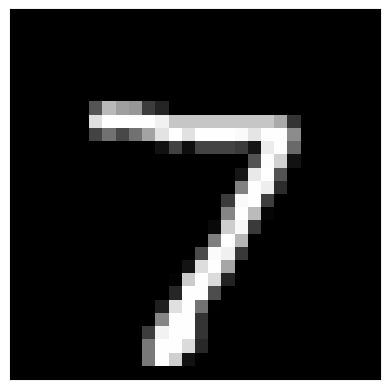

In [44]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [45]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 [==============================] - 1s 661ms/step
[[5.5759571e-08 4.8354224e-07 2.0294122e-07 5.1446127e-06 3.1355352e-11
  3.0328025e-09 1.9057860e-14 9.9999094e-01 8.0842968e-09 3.2474902e-06]]


In [53]:
print(predictions[:,7])

[0.99999094]


In [46]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 7.


# **Assignment:** Write a function to name the labels of predicted images!